In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

1. Upload all data being compared.

In [2]:
hpi=pd.read_csv('../data/hpi_2000-2020.csv')
zip0=pd.read_csv('../data/zip0.csv')
zip1=pd.read_csv('../data/zip1.csv')
zip2=pd.read_csv('../data/zip2.csv')
zip3=pd.read_csv('../data/zip3.csv')
zip4=pd.read_csv('../data/zip4.csv')
zip5=pd.read_csv('../data/zip5.csv')
zip6=pd.read_csv('../data/zip6.csv')
zip7=pd.read_csv('../data/zip7.csv')
zip8=pd.read_csv('../data/zip8.csv')
zip9=pd.read_csv('../data/zip9.csv')

2. Seperate HPI by single digit zip.

In [3]:
hpi_zip0=hpi[hpi['one-digit ZIP']==0]
hpi_zip1=hpi[hpi['one-digit ZIP']==1]
hpi_zip2=hpi[hpi['one-digit ZIP']==2]
hpi_zip3=hpi[hpi['one-digit ZIP']==3]
hpi_zip4=hpi[hpi['one-digit ZIP']==4]
hpi_zip5=hpi[hpi['one-digit ZIP']==5]
hpi_zip6=hpi[hpi['one-digit ZIP']==6]
hpi_zip7=hpi[hpi['one-digit ZIP']==7]
hpi_zip8=hpi[hpi['one-digit ZIP']==8]
hpi_zip9=hpi[hpi['one-digit ZIP']==9]

3. Merge data on matching zips.

In [4]:
zip0_hpi_merge = pd.merge(hpi_zip0,zip0,on='Year')
zip1_hpi_merge = pd.merge(hpi_zip1,zip1,on='Year')
zip2_hpi_merge = pd.merge(hpi_zip2,zip2,on='Year')
zip3_hpi_merge = pd.merge(hpi_zip3,zip3,on='Year')
zip4_hpi_merge = pd.merge(hpi_zip4,zip4,on='Year')
zip5_hpi_merge = pd.merge(hpi_zip5,zip5,on='Year')
zip6_hpi_merge = pd.merge(hpi_zip6,zip6,on='Year')
zip7_hpi_merge = pd.merge(hpi_zip7,zip7,on='Year')
zip8_hpi_merge = pd.merge(hpi_zip8,zip8,on='Year')
zip9_hpi_merge = pd.merge(hpi_zip9,zip9,on='Year')

4. Combine all data back to common dataframe.

In [5]:
ZIP_VS_HPI = pd.concat([zip0_hpi_merge,zip1_hpi_merge,zip2_hpi_merge,zip3_hpi_merge,zip4_hpi_merge,zip5_hpi_merge,zip6_hpi_merge,zip7_hpi_merge,zip8_hpi_merge,zip9_hpi_merge])

5. Rename columns for clarity. 

In [6]:
new_column_names = {'HPI':'1975 HPI base','Annual Change (%)':'Since 1975 Percent Change','percent_change':'employment year by year percent change'}

In [7]:
ZIP_VS_HPI.rename(columns=new_column_names,inplace=True)

6. Create pivot tables for use in graphs.

In [8]:
HPI_2000_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='HPI with 2000 base', index='Year', columns='one-digit ZIP')
HPI_1975_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='1975 HPI base', index='Year', columns='one-digit ZIP')
employment_percent_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='employment_by_thosands', index='Year', columns='one-digit ZIP')

7. Create some base visuals for possible use.

<AxesSubplot:xlabel='Year'>

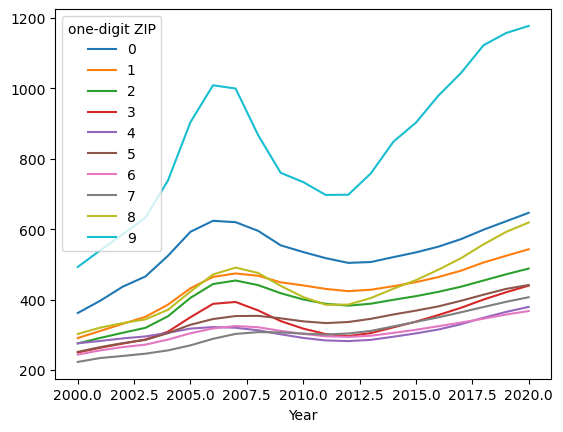

In [9]:
HPI_1975_pivot_table.plot(kind='line')

<AxesSubplot:xlabel='Year'>

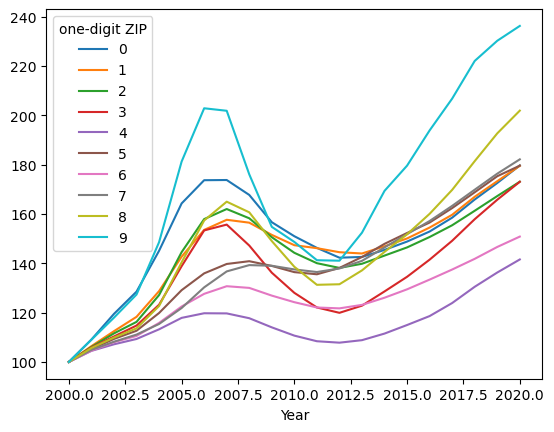

In [10]:
HPI_2000_pivot_table.plot(kind='line')

<AxesSubplot:xlabel='Year'>

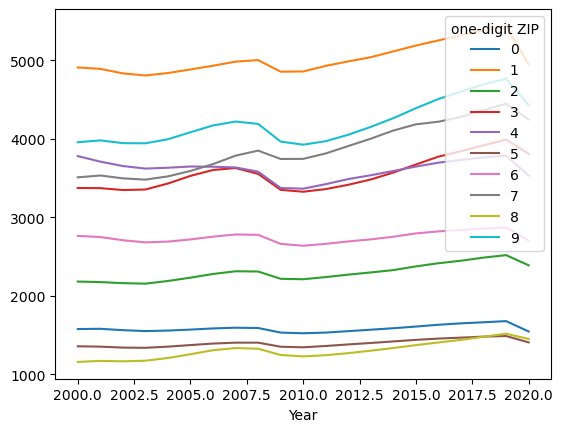

In [11]:
employment_percent_pivot_table.plot(kind='line')

In [12]:
gdf = gpd.read_file('../data/ne_10m_admin_1_states_provinces.shp')

ImportError: The 'read_file' function requires the 'pyogrio' or 'fiona' package, but neither is installed or imports correctly.
Importing fiona resulted in: DLL load failed while importing ogrext: The specified module could not be found.
Importing pyogrio resulted in: No module named 'pyogrio'